<a href="https://colab.research.google.com/github/parisazeynaly/Customer-Segmentation-KMeans/blob/main/Customer_Segmentation_with_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
# --- 1. Data Loading and Initial Exploration ---
df = pd.read_csv("Mall_Customers.csv")
print("Initial data head:")
print(df.head())
print("\nData info:")
print(df.info())

Initial data head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB
None


In [3]:
# --- 2. Data Preprocessing ---
# Select the features for clustering: Annual Income and Spending Score
# It's a best practice to standardize data for distance-based algorithms like K-Means
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

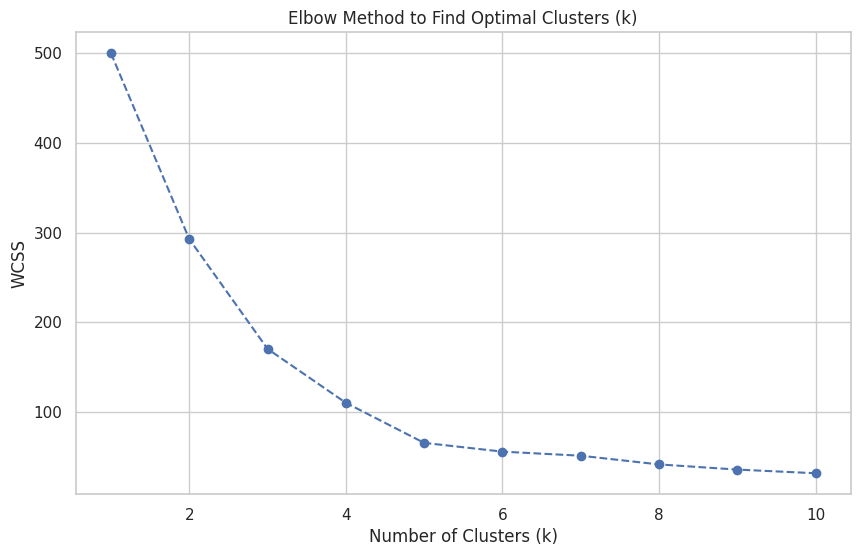

In [5]:
# Determine the Optimal Number of Clusters (Elbow Method) ---
# We use the Elbow Method to find the best value for 'k' by plotting WCSS.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Based on the plot, the 'elbow' is at k=5.
optimal_clusters = 5

In [6]:
# --- 4. Apply K-Means Clustering with Optimal K ---
kmeans_final = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['cluster'] = kmeans_final.fit_predict(X_scaled)
df['cluster Name'] = df['cluster'].astype('category') # Convert to a categorical type for better visualization


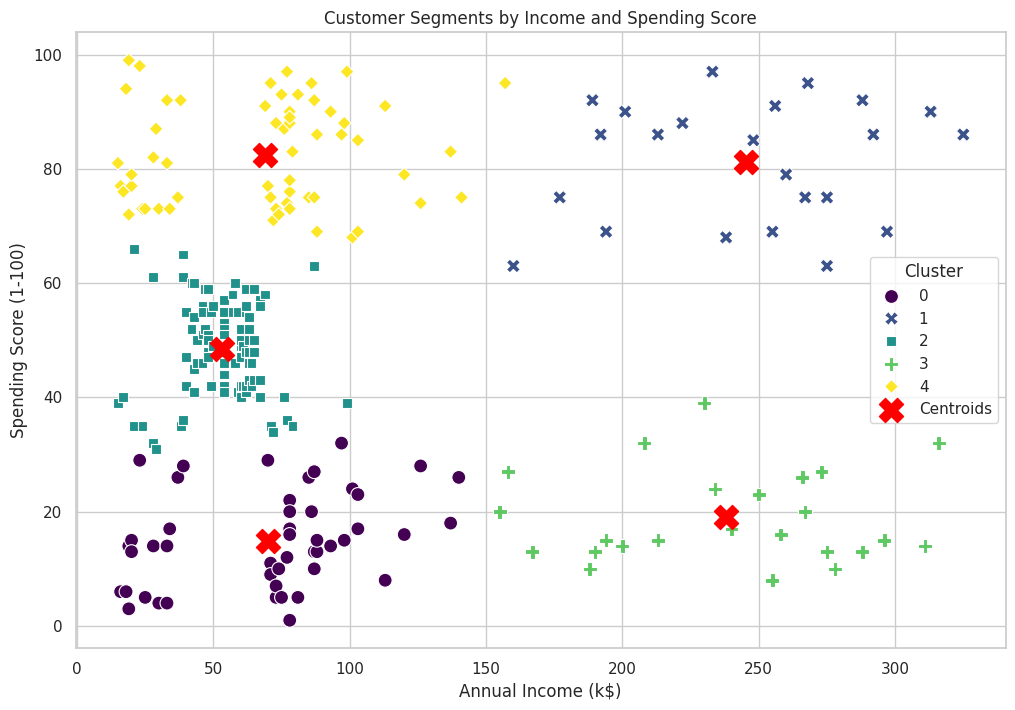

In [7]:
# --- 5. Analyze and Visualize the Clusters ---
# Get the coordinates of the cluster centroids
centroids = scaler.inverse_transform(kmeans_final.cluster_centers_)
df_centroids = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Visualize the clusters and their centroids
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df,
    hue='cluster',
    palette='viridis',
    s=100,
    style='cluster',
    markers=True
)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=300,
    marker='X',
    label='Centroids'
)
plt.title('Customer Segments by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [8]:
# --- 6. Provide a Data-Driven Summary of Clusters ---
print("\nCluster-wise Summary:")
cluster_summary = df.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
print(cluster_summary)


Cluster-wise Summary:
          Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                  
0        42.9                70.1                    14.9
1        31.3               245.1                    81.3
2        42.0                53.3                    48.5
3        42.2               237.9                    19.0
4        30.5                68.9                    82.4


Adding new column to data set

In [11]:
# All

import pandas as pd
import numpy as np

# Create a list of example customer reviews
reviews = [
    "The product quality is excellent, very happy with the purchase.",
    "Customer service was terrible, they were not helpful at all.",
    "The quality is good but the price is too high.",
    "Loved the product, fast shipping and great price.",
    "The product arrived damaged, poor quality control.",
    "This is the worst product I have ever bought, completely useless.",
    "Very satisfied with the item and the quick delivery.",
    "Happy with the service, but the item broke after a week.",
    "I have no complaints about the product or the service.",
    "The price is great, but the quality is just okay.",
    "Terrible experience. The support team was rude.",
    "Highly recommend this! It's fantastic and well worth the money.",
    "The product is fine, but the delivery was very slow.",
    "I'm disappointed with the quality, it's not what I expected.",
    "Absolutely love the quality and the customer support team.",
    "This product is a total scam, don't buy it.",
    "The service was fast, but the item is poor quality.",
    "The product is good, but the price is a bit steep.",
    "Very happy with my order. Great value for the price.",
    "The support team was helpful, but the product is mediocre."
]

# Load your DataFrame
df = pd.read_csv("Mall_Customers.csv")

# Use numpy.random.choice to randomly select from the reviews list
# This creates a new list with a length equal to the number of rows in the DataFrame (200).
df['reviews'] = np.random.choice(reviews, size=len(df), replace=True)

df.to_csv("data_with_comments.csv", index=False)

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

                                             reviews  
0     The quality is good but the price is too high.  
1  The price is great, but the quality is just okay.  
2  The product is good, but the price is a bit st...  
3  Customer service was terrible, they were not h...  
4  The price is great, but the quality is just okay.  


Preprocessing the new row column (reviews)